In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Гаражи и автомобили

In [2]:
days = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница']
street = [80, 98, 75, 91, 78]
garage = [100, 82, 105, 89, 102]

df = pd.DataFrame({'Улица':street, 'Гараж':garage}, index=days)
display(df)
print('Коэффициент корреляции Пирсона:', round(df['Улица'].corr(df['Гараж']), 2), '; Отрицательная корреляция')

,Улица,Гараж
Понедельник,80,100
Вторник,98,82
Среда,75,105
Четверг,91,89
Пятница,78,102


Коэффициент корреляции Пирсона: -1.0 ; Отрицательная корреляция


### Диаграмма рассеяния

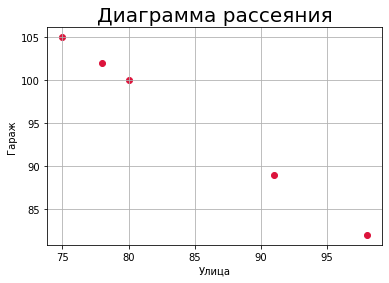

In [3]:
plt.grid(True)
plt.title('Диаграмма рассеяния', fontsize=20)
plt.xlabel('Улица')
plt.ylabel('Гараж')
plt.scatter(df['Улица'], df['Гараж'], marker = 'o', color = 'crimson')

### Работа с данными файла "bitcoin.csv"

In [4]:
data = pd.read_csv('bitcoin.csv')
projection = 14
data['predict'] = data['close'].shift(-projection)
data.head()

,Unnamed: 0,time,high,low,open,volumefrom,volumeto,close,predict
0,0,2015-12-20,462.76,431.10,461.20,121531.64,54316484.95,441.78,430.70
1,1,2015-12-21,445.54,423.99,441.78,121990.88,53270215.60,437.59,433.32
2,2,2015-12-22,443.22,433.25,437.59,65785.54,28845536.39,437.03,431.20
3,3,2015-12-23,444.78,434.28,437.03,63247.04,27877349.10,442.43,430.82
4,4,2015-12-24,460.62,441.76,442.43,79604.01,36096662.15,452.98,457.05


In [5]:
# Нормализация для нормального среза
X = np.array(data['close'], type(float))
y = np.array(data['predict'], type(float))

# Делаем срез по 14 дням
X = X[:-projection].reshape(-1, 1)
y = y[:-projection]

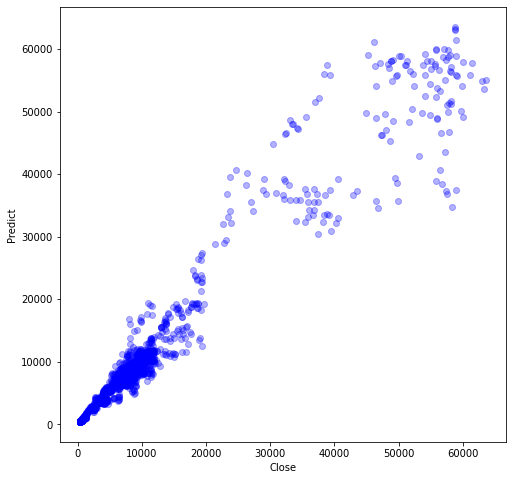

In [6]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y, color = 'blue', alpha=0.3)
plt.xlabel('Close')
plt.ylabel('Predict')
plt.show()

### Строим линейную регрессию

Наклон линии регрессии (коэф. регрессии): [0.98893729]
y-перехват:  354.08558180726686
Коэффициент детерминации: 0.9490624388820347
Предсказание стоимости криптовалюты за последние 14 дней:


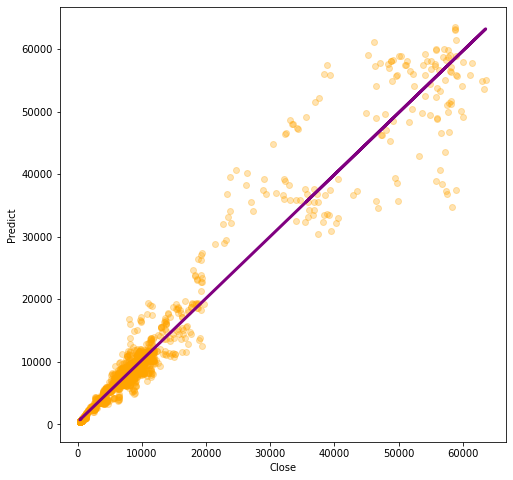

,hidden input,predicted
1987,34611.58,34582.767861
1988,35662.59,35622.150847
1989,37290.83,37232.378107
1990,36683.51,36631.776709
1991,37576.98,37515.362514
1992,39229.66,39149.759401
1993,36861.50,36807.797658
1994,35538.40,35499.334724
1995,35798.57,35756.626540
1996,33582.86,33565.428287


In [7]:
regression = LinearRegression()
regression.fit(X, y) # обучение

print("Наклон линии регрессии (коэф. регрессии):", regression.coef_)
print("y-перехват: ", regression.intercept_)
print("Коэффициент детерминации:", regression.score(X,y))
print("Предсказание стоимости криптовалюты за последние 14 дней:")
result = pd.DataFrame({'hidden input':data['close'][-projection:],
                    'predicted':regression.predict(np.array(data['close'][-projection:]).reshape(-1,1)),
                    })

plt.figure(figsize=(8, 8))
plt.scatter(X, y, color = 'orange', alpha=0.3)
plt.plot(X, regression.predict(X), color='purple', linewidth=3)
plt.xlabel('Close')
plt.ylabel('Predict')
plt.show()

display(result)

### Сравнение скрытых значений с предсказанными

Коэффициент корреляции Пирсона: 1.0 ; Положительная корреляция


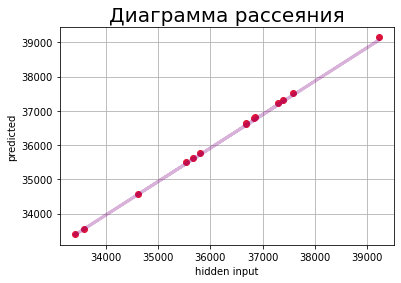

In [8]:
print('Коэффициент корреляции Пирсона:', round(result['hidden input'].corr(result['predicted']), 2), '; Положительная корреляция')

plt.grid(True)
plt.title('Диаграмма рассеяния', fontsize=20)
plt.xlabel('hidden input')
plt.ylabel('predicted')
plt.scatter(result['hidden input'], result['predicted'], marker = 'o', color = 'crimson')
plt.plot(result['hidden input'], regression.predict(np.array(result['predicted']).reshape(-1,1)), color='purple', linewidth=3, alpha=0.3)
plt.show()

### Работа с данными "housePrice.csv"

Описание:


,Area,Price(USD)
count,3.479000e+03,3.479000e+03
mean,8.744000e+06,1.786341e+05
std,3.167266e+08,2.699978e+05
min,3.000000e+01,1.200000e+02
25%,6.900000e+01,4.727500e+04
50%,9.000000e+01,9.666667e+04
75%,1.200000e+02,2.000000e+05
max,1.616000e+10,3.080000e+06


Пропуски:
Area          0
Price(USD)    0
dtype: int64


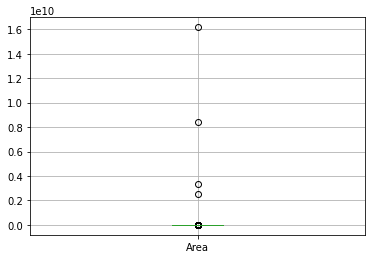

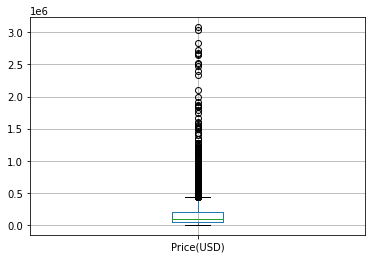

Количество выбросов столбца 'Area': 4 из общего числа: 3479
Количество выбросов столбца 'Price(USD)': 279 из общего числа: 3479


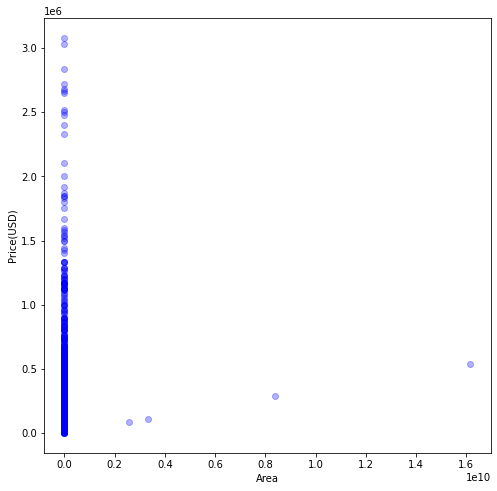

In [9]:
df = pd.read_csv('housePrice.csv')
data = df.drop(['Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price'], axis=1)
data['Area'] = data['Area'].apply(lambda item: float( item.replace(' ', '').replace(',', '') ))

print("Описание:")
display(data.describe())
print(f'Пропуски:\n{data.isna().sum()}')
data = data.dropna()

pd.DataFrame(data['Area']).boxplot()
plt.show()
pd.DataFrame(data['Price(USD)']).boxplot()
plt.show()

print("Количество выбросов столбца 'Area':", len(data[data['Area']>(8.744000e+06+3.167266e+08)]) + len(data[data['Area']<(8.744000e+06-3.167266e+08)]), "из общего числа:", len(data))
print("Количество выбросов столбца 'Price(USD)':", len(data[data['Price(USD)']>(1.786341e+05+2.699978e+05)]) + len(data[data['Price(USD)']<(1.786341e+05-2.699978e+05)]), "из общего числа:", len(data))

X = np.array(data['Area'], type(float))
y = np.array(data['Price(USD)'], type(float))

plt.figure(figsize=(8, 8))
plt.scatter(X, y, color = 'blue', alpha=0.3)
plt.xlabel('Area')
plt.ylabel('Price(USD)')
plt.xticks()
plt.show()

### Удалим выбросы в столбце Area

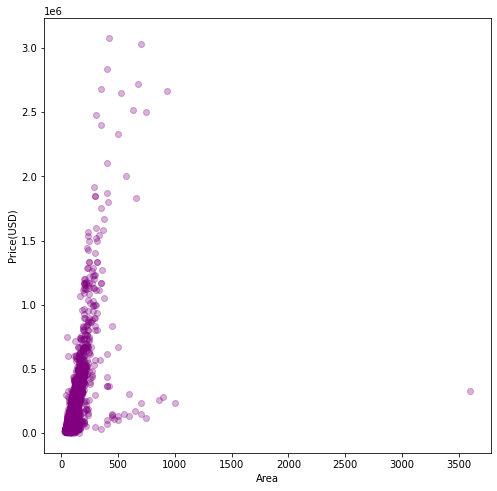

,Area,Price(USD)
0,63.0,61666.67
1,60.0,61666.67
2,79.0,18333.33
3,95.0,30083.33
4,123.0,233333.33


In [10]:
data.drop(data[data['Area']>(8.744000e+06+3.167266e+08)].index, inplace=True)
data.drop(data[data['Area']<(8.744000e+06-3.167266e+08)].index, inplace=True)

X = np.array(data['Area'], type(float))
y = np.array(data['Price(USD)'], type(float))

plt.figure(figsize=(8, 8))
plt.scatter(X, y, color = 'purple', alpha=0.3)
plt.xlabel('Area')
plt.ylabel('Price(USD)')
plt.xticks()
plt.show()

data.head()

### Реализация линейной регрессии

Коэффициенты: b_1 = 1601.6925352034416 b_0 = 5503.2447233500425
Наклон линии регрессии (коэф. регрессии): 1601.6925352034416
y-перехват:  5503.2447233500425


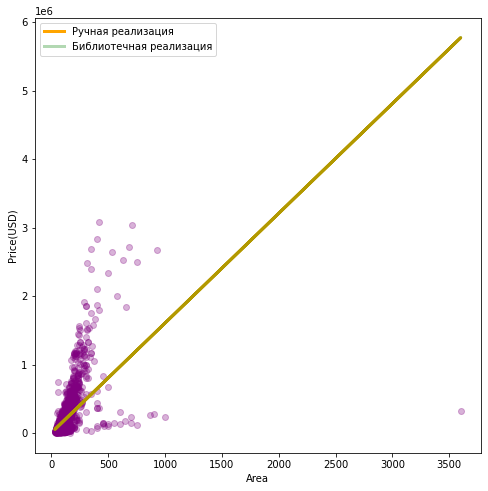

In [11]:
n = np.size(X)

# Средние значения
m_X = np.mean(X)
m_y = np.mean(y)

# Вычисление перекрёстного отклонения и отклонения около x и y соответственно
SS_Xy = np.sum(y*X) - n*m_y*m_X
SS_XX = np.sum(X*X) - n*m_X*m_X

# Вычисление коэффициентов регрессии
b_1 = SS_Xy / SS_XX
b_0 = m_y - b_1*m_X

# Вычисление регрессии
y_pred = b_0 + b_1 * X

print("Коэффициенты:", "b_1 =", b_1, "b_0 =", b_0)
print("Наклон линии регрессии (коэф. регрессии):", b_1)
print("y-перехват: ", b_0)

# Проверка при помощи библиотечной функции
model = LinearRegression()
model.fit(X.reshape(-1,1), y) # обучение

labels = ['Ручная реализация', 'Библиотечная реализация']
plt.figure(figsize=(8, 8))
plt.scatter(X, y, color = 'purple', alpha=0.3, label=labels[0])
plt.plot(X, y_pred, color='orange', linewidth=3, alpha=1)
plt.plot(X, model.predict(X.reshape(-1,1)), color='green', linewidth=3, alpha=0.3, label=labels[1])
plt.xlabel('Area')
plt.ylabel('Price(USD)')
plt.xticks()
plt.legend(labels)
plt.show()